In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram,linkage

In [43]:
df = pd.read_csv('CC GENERAL.csv')
df.dropna(inplace=True)
df.drop('CUST_ID',axis=1,inplace=True)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [44]:
x = df.values
x

array([[4.09007490e+01, 8.18182000e-01, 9.54000000e+01, ...,
        1.39509787e+02, 0.00000000e+00, 1.20000000e+01],
       [3.20246742e+03, 9.09091000e-01, 0.00000000e+00, ...,
        1.07234022e+03, 2.22222000e-01, 1.20000000e+01],
       [2.49514886e+03, 1.00000000e+00, 7.73170000e+02, ...,
        6.27284787e+02, 0.00000000e+00, 1.20000000e+01],
       ...,
       [2.33986730e+01, 8.33333000e-01, 1.44400000e+02, ...,
        8.24183690e+01, 2.50000000e-01, 6.00000000e+00],
       [1.34575640e+01, 8.33333000e-01, 0.00000000e+00, ...,
        5.57556280e+01, 2.50000000e-01, 6.00000000e+00],
       [3.72708075e+02, 6.66667000e-01, 1.09325000e+03, ...,
        8.82889560e+01, 0.00000000e+00, 6.00000000e+00]], shape=(8636, 17))

In [45]:
scaled = StandardScaler()
x_scaled = scaled.fit_transform(x)

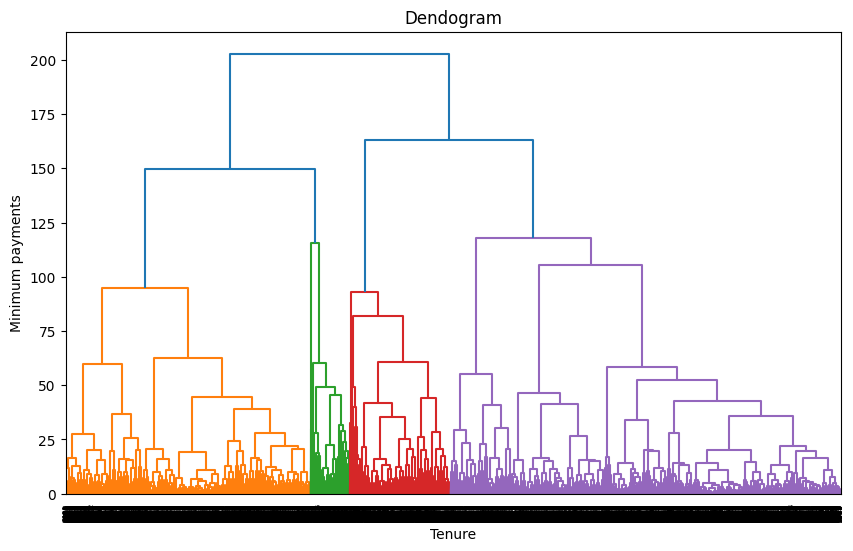

In [46]:
linked = linkage(x_scaled, method = 'ward')


plt.figure (figsize = (10,6))
dendrogram(linked)
plt.title("Dendogram")
plt.xlabel("Tenure")
plt.ylabel("Minimum payments")
plt.show()

In [47]:
model = AgglomerativeClustering(n_clusters = 4, linkage= 'ward')

labels = model.fit_predict(x_scaled)

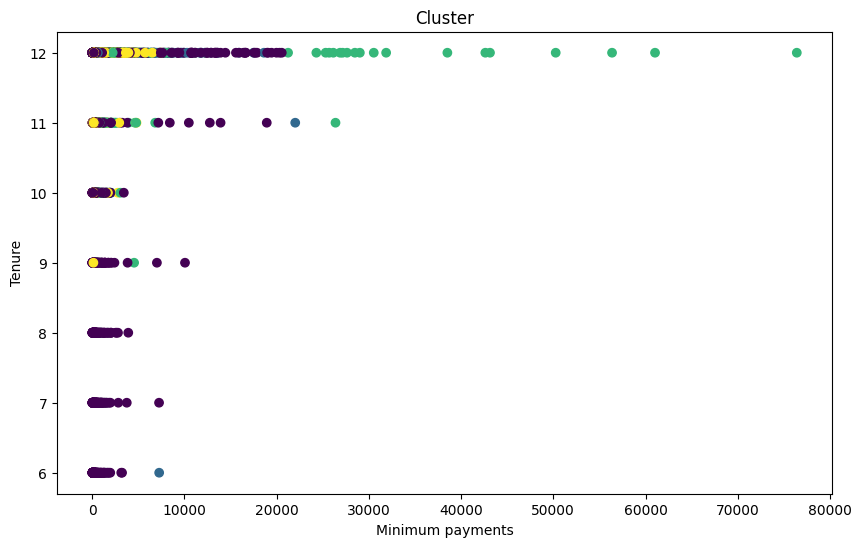

In [48]:
plt.figure (figsize = (10,6))
plt.scatter(df['MINIMUM_PAYMENTS'],df['TENURE'],c= labels)
plt.title('Cluster')
plt.xlabel("Minimum payments")
plt.ylabel("Tenure")
plt.show()